In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('data\proposicoes_2013-2024_final_pres_cam.csv')
df

,Unnamed: 0,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,VirouLei,Influencia,Aliado,Oposição,Partido_Pres_Cam,PPC_igual_partidoAutor
0,0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0,246.913.580.246.913,1,0,PMDB,0
1,1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0,246.913.580.246.913,1,0,PMDB,0
2,2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0,487.329.434.697.855,1,0,PMDB,0
3,3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0,246.913.580.246.913,1,0,PMDB,0
4,4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0,779.727.095.516.569,1,0,PMDB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,7956,PL 3027/2024,2450707,PT,2024-08-02,2024,0,0,0,1,1,1,1.325.536.062.378.160,1,0,PP,0
7957,7957,PL 3117/2024,2452037,PT,2024-08-13,2024,1,0,0,0,0,1,1.325.536.062.378.160,1,0,PP,0
7958,7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,0,1,0,0,0,1,272.904.483.430.799,1,0,PP,0
7959,7959,PL 3266/2024,2454377,UNIÃO,2024-08-21,2024,0,1,0,1,0,0,1.130.604.288.499.020,1,0,PP,0


In [52]:
df['Partido_Pres_Cam'].unique()

array(['PMDB', 'PP', 'DEM'], dtype=object)

In [53]:
cols = [col for col in df.columns if col != 'VirouLei'] + ['VirouLei']
df = df[cols]
df

,Unnamed: 0,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,Partido_Pres_Cam,PPC_igual_partidoAutor,VirouLei
0,0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,246.913.580.246.913,1,0,PMDB,0,0
1,1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,246.913.580.246.913,1,0,PMDB,0,0
2,2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,487.329.434.697.855,1,0,PMDB,0,0
3,3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,246.913.580.246.913,1,0,PMDB,0,0
4,4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,779.727.095.516.569,1,0,PMDB,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,7956,PL 3027/2024,2450707,PT,2024-08-02,2024,0,0,0,1,1,1.325.536.062.378.160,1,0,PP,0,1
7957,7957,PL 3117/2024,2452037,PT,2024-08-13,2024,1,0,0,0,0,1.325.536.062.378.160,1,0,PP,0,1
7958,7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,0,1,0,0,0,272.904.483.430.799,1,0,PP,0,1
7959,7959,PL 3266/2024,2454377,UNIÃO,2024-08-21,2024,0,1,0,1,0,1.130.604.288.499.020,1,0,PP,0,0


In [54]:
virou_lei_counts = df['VirouLei'].value_counts()
print("Total: ", virou_lei_counts)

Total:  VirouLei
0    7193
1     768
Name: count, dtype: int64


Árvore de Decisão com Cost-Sensitive Learning

In [55]:
colunas = df.columns.tolist()

In [57]:
x = df[colunas[5:-3]]
y = df[colunas[-1]]

x

,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição
0,2013,0,1,0,0,0,246.913.580.246.913,1,0
1,2013,1,1,0,0,1,246.913.580.246.913,1,0
2,2013,0,1,0,0,0,487.329.434.697.855,1,0
3,2013,0,0,0,1,0,246.913.580.246.913,1,0
4,2013,0,0,0,1,0,779.727.095.516.569,1,0
...,...,...,...,...,...,...,...,...,...
7956,2024,0,0,0,1,1,1.325.536.062.378.160,1,0
7957,2024,1,0,0,0,0,1.325.536.062.378.160,1,0
7958,2024,0,1,0,0,0,272.904.483.430.799,1,0
7959,2024,0,1,0,1,0,1.130.604.288.499.020,1,0


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 3}

#adicionando um balanceamento automatico
clf = DecisionTreeClassifier(class_weight=class_w)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


ValueError: could not convert string to float: '662.768.031.189.083'

- Visualização

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2162
           1       0.00      0.00      0.00       227

    accuracy                           0.90      2389
   macro avg       0.45      0.50      0.48      2389
weighted avg       0.82      0.90      0.86      2389



C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 90.50%


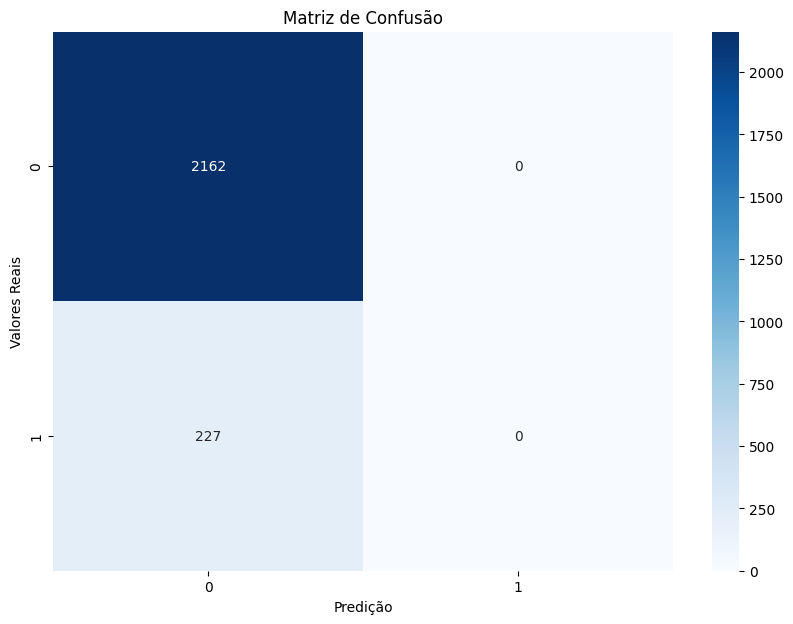

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

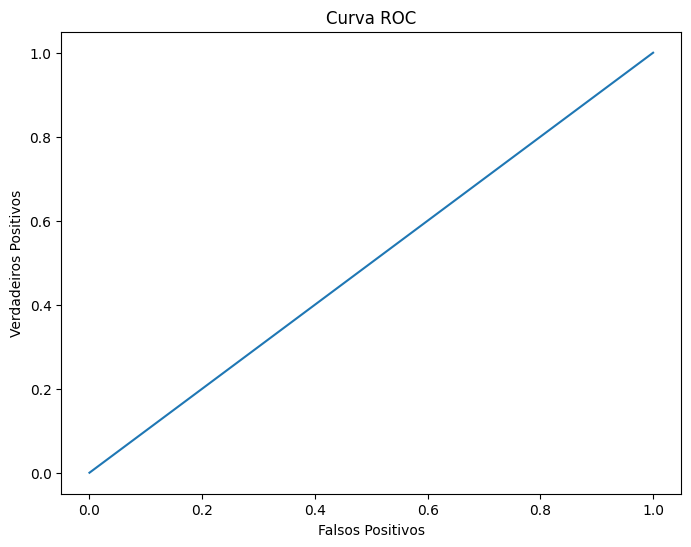

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'curva ROC (AUC = {auc:.2f})')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()


C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


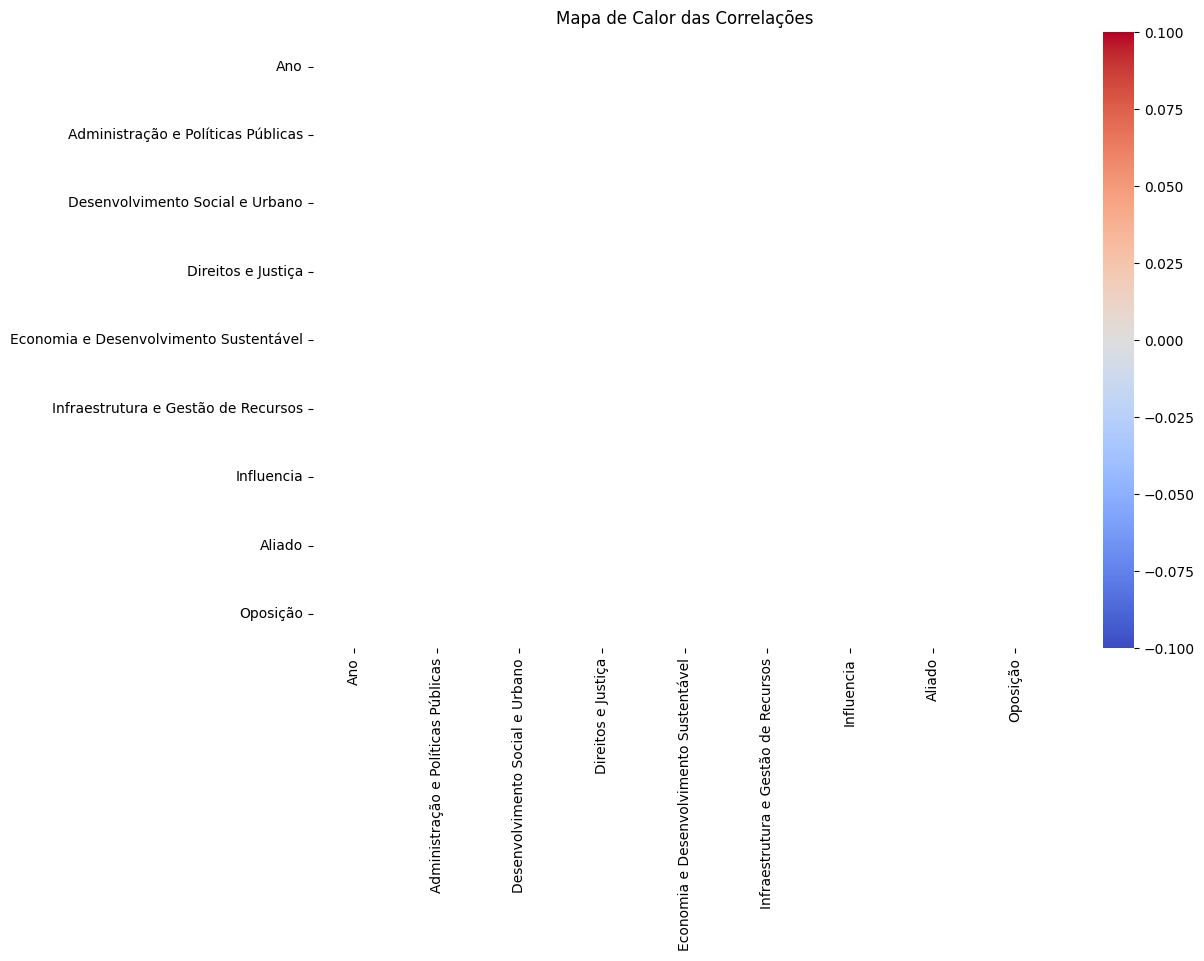

In [45]:
correlation_matrix = x.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

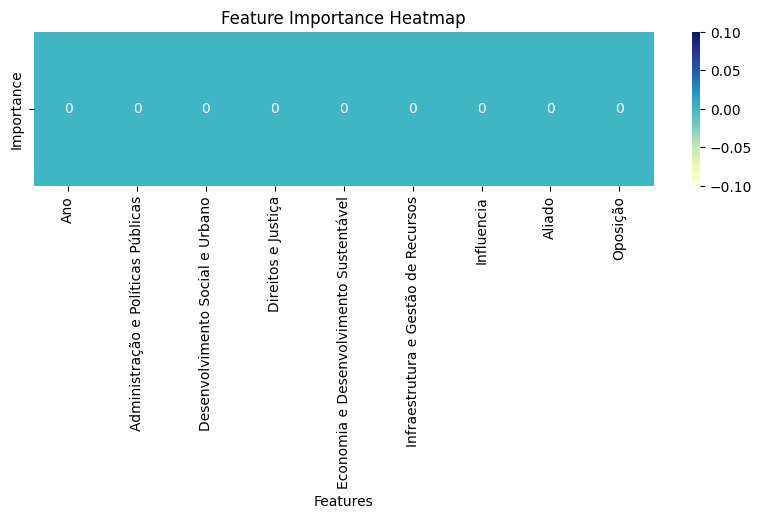

In [46]:
feature_names = x.columns
importances = clf.feature_importances_

importance_df = pd.DataFrame(importances.reshape(1, -1), columns=feature_names)

plt.figure(figsize=(10, 2))
sns.heatmap(importance_df, annot=True, cmap="YlGnBu", cbar=True, xticklabels=feature_names, yticklabels=["Importance"])
plt.title('Feature Importance Heatmap')
plt.xlabel('Features')
plt.show()

- Undersampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 49.46%


- Undersampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 65.61%


In [49]:
colunas = df.columns.tolist()
x = df[colunas[5:-4]]
y = df[colunas[-1]]

undersample = RandomUnderSampler(sampling_strategy=0.5)
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

#clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

ValueError: could not convert string to float: '584.795.321.637.426'

In [47]:
confusion_matrix(y_test, y_pred)

array([[151, 144],
       [ 50, 116]], dtype=int64)

In [57]:
x = df[[colunas[7], colunas[-4]]]
x

,Direitos e Justiça,Influencia
0,1,0.077973
1,0,0.024691
2,0,0.025341
3,0,0.148148
4,0,0.033138
...,...,...
7956,0,0.097466
7957,1,0.083821
7958,0,0.132554
7959,1,0.011696


In [59]:
colunas = df.columns.tolist()
x = df[colunas[-4:-1]]
y = df[colunas[-1]]

undersample = RandomUnderSampler(sampling_strategy=0.5)
x_sample, y_sample = undersample.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=42)

#penalização customizada
class_w = {0: 1, 1: 10}

#clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy*100:.2f}%')

Acurácia do modelo: 56.18%
